## Libreta Sesión 15 - Feature Engineering

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/xaramillo/ml-bootcamp-labs/refs/heads/main/data/raw/synthetic_petroleum_dataset.csv')

In [5]:
# Dataframe para esta sesión
df

,WellID,Time,Pressure,BottomHolePressure,Permeability,Porosity,ReservoirThickness,FlowRate,Viscosity,Density,OilProduction
0,Well_51,38,4743.820615,1822.167535,323.733974,23.831385,35.111987,120.713322,1.426282,823.699096,615.960560
1,Well_92,38,1658.964153,1998.111224,520.998050,19.530632,37.676133,2626.818320,1.549382,829.638798,1080.784762
2,Well_14,53,1168.601668,991.806085,689.692681,14.369382,48.189319,3016.739176,3.782663,830.167337,206.141281
3,Well_71,29,2816.221290,1143.541140,176.392416,26.068552,43.247330,4807.164914,4.636237,710.494304,213.842095
4,Well_60,41,4204.839601,1116.763414,280.885748,29.968939,41.992313,3287.362102,4.556048,924.836238,854.618795
...,...,...,...,...,...,...,...,...,...,...,...
9995,Well_15,13,2414.421105,1203.321826,48.048812,11.693901,38.739181,1051.438045,3.980325,689.673081,2359.433840
9996,Well_16,37,1254.605481,1947.022718,890.807407,20.672304,36.243575,3301.766740,3.009432,868.842501,2874.396629
9997,Well_79,47,2183.932855,2054.700126,798.767009,24.705318,41.639760,789.730872,3.097366,955.371978,1255.942879
9998,Well_18,26,2286.946065,1502.365694,830.715997,11.728822,39.045014,3983.360502,1.058778,608.284971,1579.148432


In [6]:
### Parte 1: Feature Engineering - Transformaciones no lineales

import numpy as np

In [24]:
# Función nombrada
def log_base(n,base=10):
    """Devuelve el logaritmo de un número en la base especificada"""
    return np.log(n) / np.log(base)

In [25]:
# Aplicar la función log base a nuestro dataframe:
# Opción 1. Funciones anónimas para feature engineering
 
df['Pressure'].apply( lambda x : log_base(x) )


0       3.676128
1       3.219837
2       3.067667
3       3.449667
4       3.623749
          ...   
9995    3.382813
9996    3.098507
9997    3.339239
9998    3.359256
9999    3.490377
Name: Pressure, Length: 10000, dtype: float64

In [ ]:
# Opción 2: Función nombrada

def feature_engineering_presion():
    presiones = df['Pressure'].to_list()
    res = []
    for i in presiones:
        res.append( np.log(i))
    return res

feature_engineering_presion()

In [ ]:
# Opción 3: Compatibilidad directa entre numpy y una serie de pandas
np.log(df.Pressure) / np.log(10)

0       5.259351
1       4.606545
2       4.388839
3       4.935357
4       5.184413
          ...   
9995    4.839711
9996    4.432962
9997    4.777371
9998    4.806009
9999    4.993600
Name: Pressure, Length: 10000, dtype: float64

In [26]:
df.columns

Index(['WellID', 'Time', 'Pressure', 'BottomHolePressure', 'Permeability',
       'Porosity', 'ReservoirThickness', 'FlowRate', 'Viscosity', 'Density',
       'OilProduction'],
      dtype='object')

In [28]:
# Feature engineering con funciones no-lineales (univariable)

df['log_pressure'] = df['Pressure'].apply( lambda x : np.log(x))
df['sqrt_permeability'] = df['Permeability'].apply(lambda x: np.sqrt(x) )
df['exp_porosity'] = df['Porosity'].apply(lambda x: np.exp(x))


In [29]:
df.head()

,WellID,Time,Pressure,BottomHolePressure,Permeability,Porosity,ReservoirThickness,FlowRate,Viscosity,Density,OilProduction,log_pressure,sqrt_permeability,exp_porosity
0,Well_51,38,4743.820615,1822.167535,323.733974,23.831385,35.111987,120.713322,1.426282,823.699096,615.960560,8.464598,17.992609,2.237891e+10
1,Well_92,38,1658.964153,1998.111224,520.998050,19.530632,37.676133,2626.818320,1.549382,829.638798,1080.784762,7.413949,22.825382,3.034209e+08
2,Well_14,53,1168.601668,991.806085,689.692681,14.369382,48.189319,3016.739176,3.782663,830.167337,206.141281,7.063563,26.262001,1.739977e+06
3,Well_71,29,2816.221290,1143.541140,176.392416,26.068552,43.247330,4807.164914,4.636237,710.494304,213.842095,7.943151,13.281281,2.096179e+11
4,Well_60,41,4204.839601,1116.763414,280.885748,29.968939,41.992313,3287.362102,4.556048,924.836238,854.618795,8.343991,16.759646,1.035964e+13


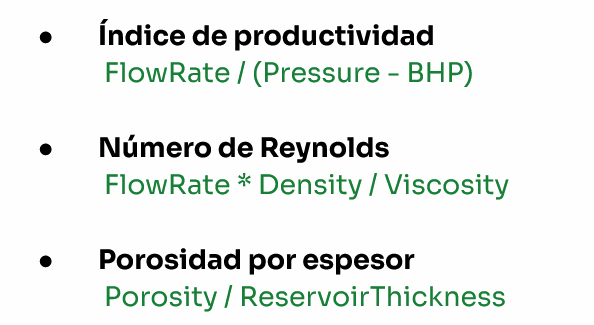

In [31]:
# Multivariable feature engineering
df['Productivity_Index'] = df['FlowRate'] / (df['Pressure'] - df['BottomHolePressure'] )

In [35]:
df[['FlowRate','Pressure','BottomHolePressure','Productivity_Index']].sample(10)

,FlowRate,Pressure,BottomHolePressure,Productivity_Index
1174,1664.965004,1068.691963,868.377051,8.311738
1215,2067.984678,4814.288895,1909.279639,0.711869
300,1648.585366,4956.297862,2424.523330,0.651158
7374,4940.678660,2347.932490,2100.800043,19.992027
4439,3653.482552,4823.246973,1043.881606,0.966692
8289,366.041715,2323.904278,891.378347,0.255522
845,3399.545042,3331.477445,1065.181665,1.500045
9642,1169.477728,2708.624165,1136.548051,0.743907
2834,3254.410026,4156.019538,2458.138807,1.916748
8183,2690.997051,2657.906910,1370.952185,2.090980


In [36]:
df['Reynolds_Index'] = df['FlowRate'] * df['Density'] / df['Viscosity']

In [37]:
df['Pososity_Thicknes_Index'] = df['Porosity'] * df['ReservoirThickness']

In [38]:
df.head()

,WellID,Time,Pressure,BottomHolePressure,Permeability,Porosity,ReservoirThickness,FlowRate,Viscosity,Density,OilProduction,log_pressure,sqrt_permeability,exp_porosity,Productivity_Index,Reynolds_Index,Pososity_Thicknes_Index
0,Well_51,38,4743.820615,1822.167535,323.733974,23.831385,35.111987,120.713322,1.426282,823.699096,615.960560,8.464598,17.992609,2.237891e+10,0.041317,6.971373e+04,836.767269
1,Well_92,38,1658.964153,1998.111224,520.998050,19.530632,37.676133,2626.818320,1.549382,829.638798,1080.784762,7.413949,22.825382,3.034209e+08,-7.745366,1.406567e+06,735.838666
2,Well_14,53,1168.601668,991.806085,689.692681,14.369382,48.189319,3016.739176,3.782663,830.167337,206.141281,7.063563,26.262001,1.739977e+06,17.063431,6.620728e+05,692.450751
3,Well_71,29,2816.221290,1143.541140,176.392416,26.068552,43.247330,4807.164914,4.636237,710.494304,213.842095,7.943151,13.281281,2.096179e+11,2.873930,7.366887e+05,1127.395284
4,Well_60,41,4204.839601,1116.763414,280.885748,29.968939,41.992313,3287.362102,4.556048,924.836238,854.618795,8.343991,16.759646,1.035964e+13,1.064534,6.673045e+05,1258.465059


In [43]:
df.shape

(10000, 17)

In [39]:
# Feature Engineering con métodos empíricos (Relación de Variables en un polinomio)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

In [40]:
features = poly.fit_transform(df[['FlowRate','Density','Viscosity']])

In [51]:
reynolds_poly_df = pd.DataFrame(features)
reynolds_poly_df.columns = [ ''.join(['Reynolds_Poly_',str(i)]) for i in reynolds_poly_df.columns ]

In [52]:
reynolds_poly_df.head()

,Reynolds_Poly_0,Reynolds_Poly_1,Reynolds_Poly_2,Reynolds_Poly_3,Reynolds_Poly_4,Reynolds_Poly_5,Reynolds_Poly_6,Reynolds_Poly_7,Reynolds_Poly_8,Reynolds_Poly_9,Reynolds_Poly_10,Reynolds_Poly_11,Reynolds_Poly_12,Reynolds_Poly_13,Reynolds_Poly_14,Reynolds_Poly_15,Reynolds_Poly_16,Reynolds_Poly_17,Reynolds_Poly_18,Reynolds_Poly_19
0,1.0,120.713322,823.699096,1.426282,1.457171e+04,9.943145e+04,172.171265,678480.200002,1174.827373,2.034281,1.758999e+06,1.200270e+07,2.078337e+04,8.190160e+07,1.418173e+05,245.564813,5.588635e+08,9.677042e+05,1675.635390,2.901459
1,1.0,2626.818320,829.638798,1.549382,6.900174e+06,2.179310e+06,4069.945607,688300.534506,1285.427604,2.400585,1.812550e+10,5.724652e+09,1.069101e+07,1.808040e+09,3.376585e+06,6305.901370,5.710408e+08,1.066441e+06,1991.618679,3.719424
2,1.0,3016.739176,830.167337,3.782663,9.100715e+06,2.504398e+06,11411.307234,689177.806814,3140.243150,14.308538,2.745448e+10,7.555117e+09,3.442494e+07,2.079070e+09,9.473295e+06,43165.128037,5.721329e+08,2.606927e+06,11878.481130,54.124376
3,1.0,4807.164914,710.494304,4.636237,2.310883e+07,3.415463e+06,22287.153763,504802.156550,3294.019675,21.494690,1.110880e+11,1.641870e+10,1.071380e+08,2.426667e+09,1.583490e+07,103328.517267,3.586591e+08,2.340382e+06,15271.854473,99.654466
4,1.0,3287.362102,924.836238,4.556048,1.080675e+07,3.040272e+06,14977.379752,855322.067085,4213.598355,20.757574,3.552570e+10,9.994474e+09,4.923607e+07,2.811753e+09,1.385162e+07,68237.662081,7.910328e+08,3.896888e+06,19197.356646,94.572505


In [53]:
pd.concat([df,reynolds_poly_df],axis=1)

,WellID,Time,Pressure,BottomHolePressure,Permeability,Porosity,ReservoirThickness,FlowRate,Viscosity,Density,...,Reynolds_Poly_10,Reynolds_Poly_11,Reynolds_Poly_12,Reynolds_Poly_13,Reynolds_Poly_14,Reynolds_Poly_15,Reynolds_Poly_16,Reynolds_Poly_17,Reynolds_Poly_18,Reynolds_Poly_19
0,Well_51,38,4743.820615,1822.167535,323.733974,23.831385,35.111987,120.713322,1.426282,823.699096,...,1.758999e+06,1.200270e+07,2.078337e+04,8.190160e+07,1.418173e+05,245.564813,5.588635e+08,9.677042e+05,1675.635390,2.901459
1,Well_92,38,1658.964153,1998.111224,520.998050,19.530632,37.676133,2626.818320,1.549382,829.638798,...,1.812550e+10,5.724652e+09,1.069101e+07,1.808040e+09,3.376585e+06,6305.901370,5.710408e+08,1.066441e+06,1991.618679,3.719424
2,Well_14,53,1168.601668,991.806085,689.692681,14.369382,48.189319,3016.739176,3.782663,830.167337,...,2.745448e+10,7.555117e+09,3.442494e+07,2.079070e+09,9.473295e+06,43165.128037,5.721329e+08,2.606927e+06,11878.481130,54.124376
3,Well_71,29,2816.221290,1143.541140,176.392416,26.068552,43.247330,4807.164914,4.636237,710.494304,...,1.110880e+11,1.641870e+10,1.071380e+08,2.426667e+09,1.583490e+07,103328.517267,3.586591e+08,2.340382e+06,15271.854473,99.654466
4,Well_60,41,4204.839601,1116.763414,280.885748,29.968939,41.992313,3287.362102,4.556048,924.836238,...,3.552570e+10,9.994474e+09,4.923607e+07,2.811753e+09,1.385162e+07,68237.662081,7.910328e+08,3.896888e+06,19197.356646,94.572505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Well_15,13,2414.421105,1203.321826,48.048812,11.693901,38.739181,1051.438045,3.980325,689.673081,...,1.162388e+09,7.624487e+08,4.400337e+06,5.001154e+08,2.886327e+06,16657.920546,3.280423e+08,1.893238e+06,10926.482486,63.060244
9996,Well_16,37,1254.605481,1947.022718,890.807407,20.672304,36.243575,3301.766740,3.009432,868.842501,...,3.599475e+10,9.471829e+09,3.280781e+07,2.492462e+09,8.633202e+06,29903.038357,6.558782e+08,2.271782e+06,7868.826805,27.255452
9997,Well_79,47,2183.932855,2054.700126,798.767009,24.705318,41.639760,789.730872,3.097366,955.371978,...,4.925353e+08,5.958415e+08,1.931749e+06,7.208155e+08,2.336921e+06,7576.421380,8.720020e+08,2.827076e+06,9165.528325,29.715121
9998,Well_18,26,2286.946065,1502.365694,830.715997,11.728822,39.045014,3983.360502,1.058778,608.284971,...,6.320462e+10,9.651755e+09,1.679980e+07,1.473886e+09,2.565439e+06,4465.390726,2.250719e+08,3.917591e+05,681.894111,1.186902


In [59]:
## tsfresh
!pip install tsfresh


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [60]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [61]:
# Parte 1: Extraer características

ts_feats = extract_features(df,column_id='WellID',column_sort='Time')

Feature Extraction: 100%|██████████| 10/10 [01:09<00:00,  6.94s/it]


In [62]:
# Parte 2: Imputación

ts_feats = impute(ts_feats)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['Pressure__fft_coefficient__attr_"real"__coeff_64'
 'Pressure__fft_coefficient__attr_"real"__coeff_65'
 'Pressure__fft_coefficient__attr_"real"__coeff_66' ...
 'Pososity_Thicknes_Index__fft_coefficient__attr_"angle"__coeff_98'
 'Pososity_Thicknes_Index__fft_coefficient__attr_"angle"__coeff_99'
 'Pososity_Thicknes_Index__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [66]:
type(ts_feats)

pandas.core.frame.DataFrame

In [67]:
ts_feats.to_csv('data/processed_tsfresh_pretroleum_dataset.csv',index=None)